#### Question B
Use a linear model with softmax activation to perform the classification.  Use a single layer of 100 neurons for your first attempt.

Use the hold-out cross validation.  Hold out the first 100 images from mnist.train.images.  You can get the hold out validation data using mnist.train.next_batch(100).

### Question B.1
[5] Clearly define the model and the cost function.  To train the network, use batch size of  100 for each epoch.

In [20]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:
tf.reset_default_graph()

numPixels = 784
numClassifications = 10

# N x 784. Input size of x
x = tf.placeholder(tf.float32, [None, numPixels])

# N x 10. Input size of the correct data
ref = tf.placeholder(tf.float32, [None, numClassifications])

logits = tf.layers.dense(inputs=x, units=numClassifications, activation=None, name="L1")

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=ref)

# Take the average of the cross entropy values
cost = tf.reduce_mean(cross_entropy)

# (N). Take the highest percentile value in the prediction as the answer
prediction = tf.argmax(tf.nn.softmax(logits), axis=1)

labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
labels = np.array(labels)

rate = 0.01
epochs = 100
iterationsPerEpoch = 10

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

errList = []
validationErrList = []
epochList = []

count = 0
for _ in range(epochs):
    inputData, correctAns = mnist.train.next_batch(100)
    validationInput, validationCorrect = mnist.train.next_batch(100)
    for _ in range(iterationsPerEpoch):
        # Do the training
        err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})

        # Do the validation
        validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})
        validationErrList.append(validationErr)

        errList.append(err)
        epochList.append(count)
        count += 1

print("DONE")

DONE


### Question B.2
[5] Plot the training error over the epochs.

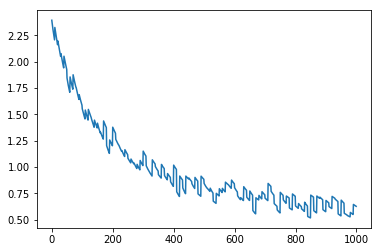

In [22]:
plt.plot(epochList, errList);
plt.show()

### Question B.3
[5] Plot the cross-validation error over the epochs. Is there overfitting?  Explain.

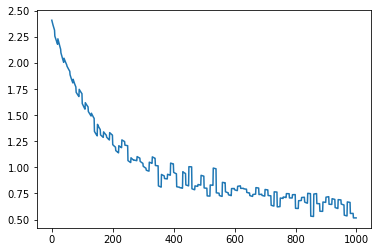

In [25]:
plt.plot(epochList, validationErrList);
plt.show()

It is hard to tell if overfitting is occuring since the the training data changes every 10 cycles of training thus you will not see a very obvious cross validation error (ie. a smooth curve going up). However it can be shown in the above graph that the cross validation error goes up and down and would likely increase with more and more training iterations. This shows a minor overfitting error.

### Question B.4
[5] Evaluate and report the test error of the best trained linear model with 10 neurons.  The test data is to be taken from mnist.test.images.

In [24]:
# Check the test errorvalidationInput, validationCorrect = mnist.train.next_batch(100)
predic = s.run((prediction), feed_dict={x: mnist.test.images})
answers = np.equal(labels, predic)
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)   
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + " percent.")

The test error for the final iteration of the training is: 13.63 percent.
